# DB 와 자료준비

매번 인터넷으로 받아오면 시간이 너무 오래 걸리기에, csv 파일로 내보내진 파일을 불러와서 DB 에 넣고 바로 시작한다.

In [1]:
import pandas as pd # 데이터프레임워크
from sqlalchemy import create_engine # 데이터베이스 툴킷
#### create table
# http://docs.sqlalchemy.org/en/latest/orm/tutorial.html
from sqlalchemy.ext.declarative import declarative_base
Base = declarative_base()

# types 
# http://docs.sqlalchemy.org/en/latest/core/type_basics.html
from sqlalchemy import Column, Integer, String, Float

class UsedCar(Base):
    __tablename__ = 'used_car'

    id = Column(Integer, primary_key=True) 
    year = Column(Integer)
    brand = Column(String(16))
    model = Column(String(16))
    title = Column(String(16))
    miles = Column(Integer)
    vendor = Column(String(16))
    photos = Column(Integer)
    video = Column(Integer)
    exterior_color = Column(String(16))
    interior_color = Column(String(16))
    transmission = Column(String(16))
    drivertrain = Column(String(16))
    star = Column(Float)
    review_no = Column(String(16))
    price = Column(Integer)

    def __repr__(self):
        return rtform % (
                        self.id, self.year, self.brand, self.model, 
                        self.title, self.miles, self.vendor, 
                        self.photos, self.video, self.exterior_color, 
                        self.interior_color, self.transmission, self.drivertrain, 
                        self.star, self.review_no, self.price, )
    
    rtform = "<UsedCar(id = '%s', year = '%s', brand = '%s', model = '%s',title = '%s', miles = '%s', vendor = '%s', photos = '%s', video = '%s', exterior_color = '%s', interior_color = '%s', transmission = '%s', drivertrain = '%s', star = '%s', review_no = '%s', price = '%s)>"

UsedCar.__table__

import pickle
    
pw = pickle.load(open('./Data/pw.plk','rb'))

# write local car_info
#engine = create_engine("mysql+mysqldb://root:" + pw.data + "@127.0.0.1/car_info", echo=True)
engine = create_engine("mysql+mysqldb://root:"+ pw +"@db/used_car", echo=True)
    
Base.metadata.create_all(engine)



df= pd.read_csv('car_info.csv')
df.to_sql(name="used_car", con=engine, if_exists='replace')

2018-04-12 19:41:38,949 INFO sqlalchemy.engine.base.Engine SHOW VARIABLES LIKE 'sql_mode'
2018-04-12 19:41:38,950 INFO sqlalchemy.engine.base.Engine ()
2018-04-12 19:41:38,955 INFO sqlalchemy.engine.base.Engine SELECT DATABASE()
2018-04-12 19:41:38,956 INFO sqlalchemy.engine.base.Engine ()
2018-04-12 19:41:38,958 INFO sqlalchemy.engine.base.Engine show collation where `Charset` = 'utf8' and `Collation` = 'utf8_bin'
2018-04-12 19:41:38,958 INFO sqlalchemy.engine.base.Engine ()
2018-04-12 19:41:38,960 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS CHAR(60)) AS anon_1
2018-04-12 19:41:38,961 INFO sqlalchemy.engine.base.Engine ()
2018-04-12 19:41:38,962 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS CHAR(60)) AS anon_1
2018-04-12 19:41:38,963 INFO sqlalchemy.engine.base.Engine ()
2018-04-12 19:41:38,964 INFO sqlalchemy.engine.base.Engine SELECT CAST('test collated returns' AS CHAR CHARACTER SET utf8) COLLATE utf8_bin AS anon_1
2018-04-12 19

/opt/conda/lib/python3.6/site-packages/sqlalchemy/dialects/mysql/base.py:1569: Warning: (1287, "'@@tx_isolation' is deprecated and will be removed in a future release. Please use '@@transaction_isolation' instead")
  cursor.execute('SELECT @@tx_isolation')


2018-04-12 19:41:39,188 INFO sqlalchemy.engine.base.Engine COMMIT
2018-04-12 19:41:39,196 INFO sqlalchemy.engine.base.Engine BEGIN (implicit)
2018-04-12 19:41:39,270 INFO sqlalchemy.engine.base.Engine INSERT INTO used_car (`index`, `Unnamed: 0`, company, drivertrain, exterior_color, interior_color, mile, photos, price, review_no, star, subname, title, transmission, vendor, video, year) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
2018-04-12 19:41:39,270 INFO sqlalchemy.engine.base.Engine ((0, 0, 'Subaru', '4wd', 'Desert Khaki', 'Black', 26525, 23, 17999, 43, 5.0, 'Crosstrek', 'Subaru Crosstrek 2.0i', '5-speed', '1st Choice Autos', 1, 2016), (1, 1, 'Mazda', '4wd', 'Silver', 'Gray', 118205, 21, 3750, 43, 5.0, 'Tribute', 'Mazda Tribute LX V6', '4-speed', '1st Choice Autos', 1, 2003), (2, 2, 'Ford', '4wd', 'Race Red', 'Black', 2330, 32, 53900, 244, 5.0, 'F-150', 'Ford F-150 Raptor', '1-speed', 'Gilbert & Baugh Ford', 1, 2018), (3, 3, 'Porsche', '4wd', 'Gray',

# 의존성 설치

In [6]:
import MySQLdb, pickle
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
from collections import Counter
from matplotlib import pyplot as plt

In [7]:
# read local car_info popular 
# pw = pickle.load(open('./Data/pw.p','rb'))

# http://mysql-python.sourceforge.net/MySQLdb.html

db = MySQLdb.connect(
    host="mysql",
    user="root",
    passwd='0',
    db='used_car',
    charset='utf8',
)

SQL_QUERY = """
    SELECT *
    FROM used_car;
"""

train = pd.read_sql(SQL_QUERY, db)
train.head(20)

,index,brand,drivetrain,exterior_color,interior_color,miles,model,photos,price,review_no,star,title,transmission,vendor,video,year
0,0,Honda,4wd,Nighthawk Black Pearl,30547,125100,Civic,32,4989,22,5.0,Honda Civic EX,5-speed,Atlanta Best Auto Collection,1,2006
1,1,Porsche,4wd,White,Black,47991,Cayenne,32,45990,83,5.0,Porsche Cayenne GTS,8-speed,Momentum Motorcars,1,2013
2,2,Nissan,4wd,Orange,Orange,7365,GT-R,32,92900,7,5.0,Nissan GT-R Premium,6-speed,Nexus Auto Brokers,1,2017
3,3,BMW,4wd,White,TAN,83075,328,32,9997,11,5.0,BMW 328 i,6-speed,Exclusive Auto Wholesale,1,2011
4,4,Audi,4wd,Cuvee Silver Metallic,Black,28990,A4,27,29498,29,5.0,Audi A4 2.0T Premium Plus quattro,7-speed,Hertz Car Sales Charlotte,1,2017
5,5,BMW,4wd,Black,Black,24720,X5,29,35998,29,5.0,BMW X5 xDrive35i,8-speed,Hertz Car Sales Charlotte,1,2016
6,6,Ford,4wd,Black,Black,60354,Mustang,24,8650,15,5.0,Ford Mustang Premium,5-speed,Car Lot of Lenoir,1,2008
7,7,Jeep,4wd,Blue,Tan,165272,Grand,22,2900,102,5.0,Jeep Grand Cherokee Laredo,6-speed,Ride On Auto,1,2004
8,8,BMW,rwd,White,Ivory,74187,320,32,13991,8,5.0,BMW 320 i,8-speed,Armada Motors Inc,1,2014
9,9,Jeep,4wd,Blue,Blue,101057,Wrangler,28,13950,16,5.0,Jeep Wrangler Unlimited,4-speed,40/42 Motorsports,1,2006


In [8]:
brand_list = []
# 모든 회사 중 가장 공통된(이름이 들쪽날쭉하지 않고 균일한 것)중 30개를 고른다.
# https://docs.python.org/2/library/collections.html#collections.Counter.most_common
for brand in Counter(train.brand).most_common(30):
    brand_list.append(brand[0])

In [9]:
# most_common 30 이 아닌 것들의 인덱스를 구한다.
idx_list = []
idx = 0
for i in train["brand"]:
    if i not in brand_list:
        idx_list.append(idx)
    idx += 1

In [10]:
# 행, 열 개수 반환
train.shape

(200, 16)

In [11]:
# 인덱스를 이용해서 most_common 30 만 남기고 train 데이터 프레임워크를 지운다.
train = train.drop(idx_list)
# 남아있는 데이터 프레임워크의 인덱스 컬럼을 생성한다.
train.reset_index(drop=True, inplace=True)
train = train.drop("index", axis=1)

Feature engineering

In [12]:
# 분류 특징(열)을 회사명과 서브이름으로
categorical_features = ['brand', 'model']

In [13]:
# 더미 데이터 생성. 두 특성의 상관을 분석하기 위해..
# 값이 없는 문자데이터이기 때문에 좌표를 부여해 준 것과 같다.
# 더미는 행렬로 생성
dummy_cat = pd.get_dummies(train[categorical_features])
dummy_cat.head()

,brand_Acura,brand_Audi,brand_BMW,brand_Cadillac,brand_Chevrolet,brand_Chrysler,brand_Dodge,brand_Ford,brand_Honda,brand_Hyundai,...,model_Supra,model_TL,model_Tundra,model_WRX,model_Wrangler,model_X-Type,model_X5,model_X6,model_XK,model_xA
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# 숫자 특성(열) 설정
numerical_features = ['year', 'miles','price']

In [15]:
# 숫자 특성(열)의 값들을 로그함수로 노멀라이즈 해준다. 숫자 크기 뿐 아니라 편차도 줄어든다.
normalize_num = np.log1p(train[numerical_features])
normalize_num.head()

,year,miles,price
0,7.604396,11.736877,8.515191
1,7.607878,10.778790,10.736201
2,7.609862,8.904630,11.439290
3,7.606885,11.327511,9.210140
4,7.609862,10.274741,10.292112


In [16]:
# pre_train = pd.merge(normalize_num, dummy_cat) 
# 특성들을 합쳐준다.
X_train_0 = normalize_num.join(dummy_cat)
# 값 특징열을 y_traing 이라는 데이터 페이스로 설정하고
y_train = X_train_0["price"]
# 이 특징열을 뺀 나머지 정보를 X_train 에 넣는다.
X_train = X_train_0.drop("price", axis=1)

In [17]:

# xgboost 는 분류기를 세트로 묶어서 정확도를 축정하는 예측 기법
# https://github.com/dmlc/xgboost/tree/master/python-package
from xgboost import XGBRegressor
# http://scikit-learn.org/stable/install.html
# 교차검정, 모델선택, KFOLD - 다모름
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

k_fold = KFold(n_splits=10, shuffle=True, random_state=2018)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [18]:
ml = XGBRegressor(n_estimators=1000, learning_rate=0.05, verbose=False)

In [37]:
%time score = cross_val_score(ml, X_train, y_train, cv=k_fold, n_jobs=-1, scoring="r2").mean()

print("Score = {0:.5f}".format(score))

CPU times: user 60 ms, sys: 30 ms, total: 90 ms
Wall time: 1.99 s
Score = 0.65971


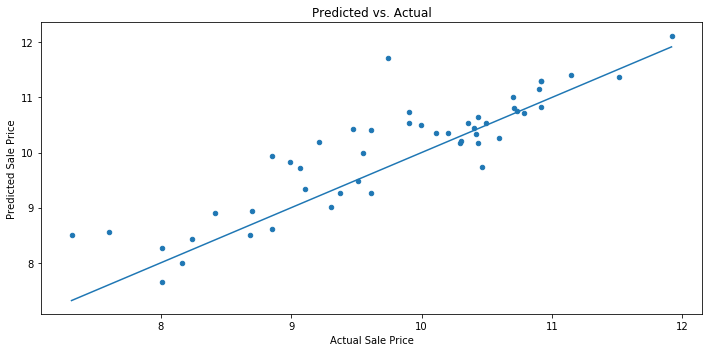

In [27]:
ml = ml.fit(X_train1, y_train1)
y_pred = ml.predict(X_test1)

plt.figure(figsize=(10, 5))
plt.scatter(y_test1, y_pred, s=20)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')

plt.plot([min(y_test1), max(y_test1)], [min(y_test1), max(y_test1)])
plt.tight_layout()

In [28]:
pickle.dump(ml, open("./Flask/models/model.plk","wb"))

In [29]:
actual_car_info = train[["brand", "model","year","miles","price"]]
pickle.dump(actual_car_info, open("./Flask/models/actual_car_info.plk","wb"))

In [30]:
brand = str(input("brand: "))
model = str(input("model: "))
year = int(input("year: "))
miles = int(input("miles: "))

brand: honda
model: civic
year: 2005
miles: 30000


In [31]:
X_train1.columns

Index(['year', 'miles', 'brand_Acura', 'brand_Audi', 'brand_BMW',
       'brand_Cadillac', 'brand_Chevrolet', 'brand_Chrysler', 'brand_Dodge',
       'brand_Ford',
       ...
       'model_Supra', 'model_TL', 'model_Tundra', 'model_WRX',
       'model_Wrangler', 'model_X-Type', 'model_X5', 'model_X6', 'model_XK',
       'model_xA'],
      dtype='object', length=139)

In [24]:
pickle.dump(X_train1.columns, open("./Flask/models/column.plk","wb"))

In [32]:
target = pd.DataFrame(columns = [X_train1.columns])

In [41]:
target

,year,miles,brand_Acura,brand_Audi,brand_BMW,brand_Cadillac,brand_Chevrolet,brand_Chrysler,brand_Dodge,brand_Ford,...,model_Supra,model_TL,model_Tundra,model_WRX,model_Wrangler,model_X-Type,model_X5,model_X6,model_XK,model_xA


In [35]:
cdx = 0
for col in X_train.columns:
    if col == 'brand'+"_"+brand:
        break;
    cdx += 1
cdx

139

In [36]:
sdx = 0
for col in X_train.columns:
    if col == 'model'+"_"+model:
        break;
    sdx += 1
sdx

139

In [37]:
target_list = np.zeros_like(X_train.loc[0])

In [38]:
target_list

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [39]:
pickle.dump(target_list, open("./Flask/models/target_list.plk","wb"))

In [43]:
target_list[cdx] = 1
target_list[sdx] = 1
target_list[0] = year
target_list[1] = miles

IndexError: index 139 is out of bounds for axis 0 with size 139

In [44]:
for i in range(1):
    target.loc[i] = target_list

In [42]:
target

,year,miles,brand_Acura,brand_Audi,brand_BMW,brand_Cadillac,brand_Chevrolet,brand_Chrysler,brand_Dodge,brand_Ford,...,model_Supra,model_TL,model_Tundra,model_WRX,model_Wrangler,model_X-Type,model_X5,model_X6,model_XK,model_xA


In [57]:
numerical_features = ['year', 'miles']
target[numerical_features] = np.log1p(target[numerical_features])

In [58]:
target

,year,miles,brand_Acura,brand_Alfa,brand_Audi,brand_BMW,brand_Bentley,brand_Cadillac,brand_Chevrolet,brand_Chrysler,...,model_Tucson,model_Tundra,model_Viper,model_Volt,model_WRX,model_Wrangler,model_X-Type,model_X5,model_XJ,model_i8
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
price_log = ml.predict(target)

In [60]:
price_log

array([12.062366], dtype=float32)

In [61]:
price = np.exp(price_log)
int(price)

173228

In [62]:
same_model = actual_car_info[actual_car_info["model"]==model] 
year_price = same_model[["year", "price"]]
year_price_list = year_price.groupby("year").agg({'price':np.mean}).astype('int')
year_price_list = year_price_list.reset_index()
year_price_list

,year,price


In [63]:
year_price_list["year"] = year_price_list["year"].apply(lambda x: str(x) )

In [64]:
year_price_list["price"] = year_price_list["price"].apply(lambda x: str(x) )

In [65]:
list(year_price_list["price"])

[]